In [5]:
# Reference: NForouzandehmehr / Bass-Diffusion-model-for-short-life-cycle-products-sales-prediction
# URL: https://github.com/NForouzandehmehr/Bass-Diffusion-model-for-short-life-cycle-products-sales-prediction/blob/master/bass.py

from scipy.optimize import leastsq, curve_fit
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

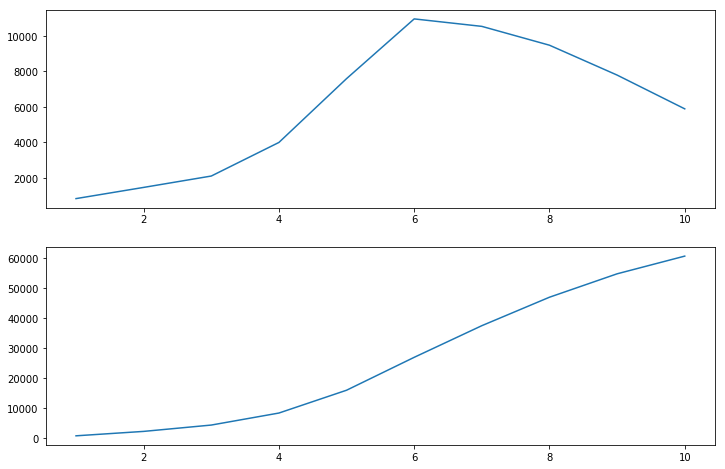

In [76]:
t = np.linspace(1.0, 10.0, num=10)
sales = np.array([840, 1470, 2110, 4000, 7590, 10950, 10530, 9470, 7790, 5890])
c_sales = np.cumsum(sales)
vars = [60630, 0.03, 0.38] # initial variables m, p, q

plt.subplots(figsize=(12, 8))
plt.subplot(211)
plt.plot(t, sales)
plt.subplot(212)
plt.plot(t, c_sales)

In [77]:
def residual(vars, t, sales):
    m, p, q = vars
    Bass = m * (((p+q)**2/p) * np.exp(-(p+q)*t))/(1+(q/p)*np.exp(-(p+q)*t))**2
    return Bass - sales

varfinal, success = leastsq(residual, vars, args=(t, sales))
m, p, q = varfinal

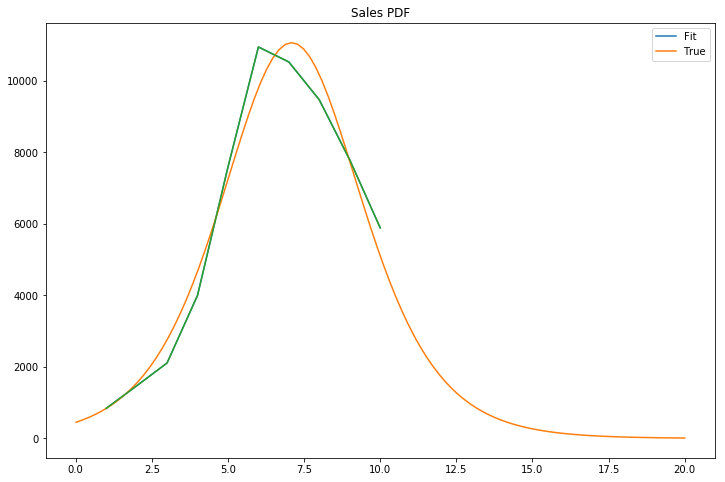

In [78]:
tp = np.linspace(1.0, 2000.0, num=100) / 100
cofactor = np.exp(-(p+q) * tp)
sales_pdf = m * (((p+q)**2/p)*cofactor)/(1+(q/p)*cofactor)**2
plt.subplots(figsize=(12,8))
plt.plot(t, sales)
plt.plot(tp, sales_pdf, t[:10], sales[:10])
plt.title('Sales PDF')
plt.legend(['Fit', 'True'])

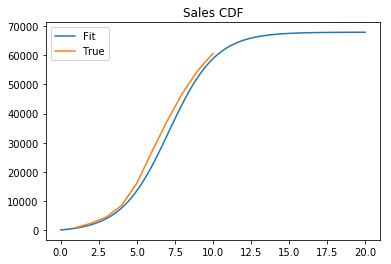

In [79]:
sales_cdf = m*(1-cofactor)/(1+(q/p)*cofactor)
plt.plot(tp, sales_cdf, t, c_sales)
plt.title('Sales CDF')
plt.legend(['Fit', 'True'])
plt.show()